# Google drive

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import statsmodels.api as sm
import statsmodels.tsa 
import csv
import librosa 

# Function 

In [3]:
def normalization (x):
    normalized = (x-min(x))/(max(x)-min(x))
    return (normalized)

# Load your signal for Audio (AR)

In [5]:
path = "../Data"

In [6]:

filename = "/1DCASEcarNoise.wav"
file = path + filename

y1 = librosa.load (file, sr = 44100)
y2 = y1 [0]
y = normalization (y2 [0:124250])

y_NS = np.reshape(y,(5,int(len(y)/5))) #segment into 5 parts #32000))

In [ ]:
plt.plot (y[0:10000])

# Load your signal for Audio (MN)

In [7]:
filename = "/test_ES2004c_1980_1990_xxxxx_4_0.wav"
file = path + filename


y1 = librosa.load (file, sr = 16000)
y2 = y1 [0]

y = normalization (y2)
y_NS = np.reshape(y,(5,int(len(y)/5))) #segment into 5 parts #32000))

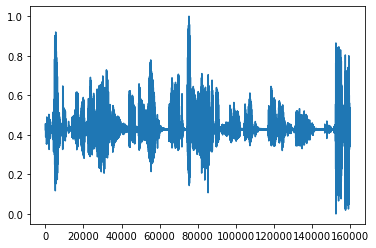

In [6]:
plt.plot (y)

# Load your signal for PPG

Longer signal - NS and NL
Shorter signal - S and NL


In [ ]:

filename = "/PPG_signal.mat"
file = path + filename

from scipy.io import loadmat
mat = loadmat(file)
y2 = mat['PPG'][0:5519800]

y = normalization (y2)

y_NS = np.reshape(y,(5,int(len(y)/5))) #segment into 5 parts #32000))

In [ ]:
plt.plot (y[0:10000])


# Load ECG

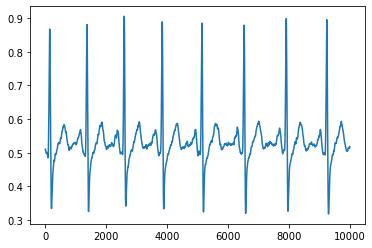

In [8]:

filename = "/ECG.mat"
file = path + filename

from scipy.io import loadmat
mat = loadmat(file)
y2 = mat['ECG'][0:5519800]

y = normalization (y2)

y_NS = np.reshape(y,(5,int(len(y)/5))) #segment into 5 parts #32000))
plt.plot (y[0:10000])


# LOAD RI

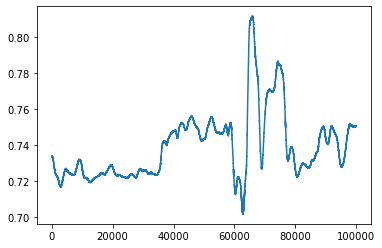

In [11]:

filename = "/RI.mat"
file = path + filename

from scipy.io import loadmat
mat = loadmat(file)
y2 = mat['RI'][0:5519800]

y = normalization (y2)

y_NS = np.reshape(y,(5,int(len(y)/5))) #segment into 5 parts #32000))
plt.plot (y[0:100000])


# Load GSR

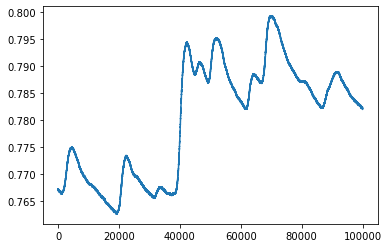

In [12]:

filename = "/GSR.mat"
file = path + filename

from scipy.io import loadmat
mat = loadmat(file)
y2 = mat['GSR'][0:5519800]

y = normalization (y2)

y_NS = np.reshape(y,(5,int(len(y)/5))) #segment into 5 parts #32000))
plt.plot (y[0:100000])


# Load signal for straight line

In [ ]:
x = np.linspace(0,1,50)
y = x

y_NS = np.reshape(y,(5,int(len(y)/5))) #segment into 5 parts #32000))


In [ ]:
plt.plot (y)

# Load signal with synthetic signals
x(n) = a1(x(n-1))
a1 = 0.5

In [ ]:
i = 1000
y2 = np.zeros (i)

y2 [0] = 10000

for n in range (1,100):
    
    y2 [n] = 0.5 * y2[n-1]
    
y = normalization (y2[0:10])
    
y_NS = np.reshape(y,(5,int(len(y)/5))) #segment into 5 parts #32000))

In [ ]:
plt.plot (y)

# Non-stationary test

In [13]:
segment_means = np.mean(y_NS,axis=1)
        
# print(segment_means)
print ('STD mean')
print (np.std(segment_means))

STD mean
0.02474095159865856


In [14]:
variances_y = np.var(y_NS,axis=1)

# print(variances_y)
print ('STD Var')
print (np.std(variances_y))

STD Var
0.0004337191670157688


small values -> data is stationary

# Non-linearity BDS Test


p-value <0.05 reject null hypothesis (data is iid), thus non-linearity observed

In [15]:
bds_stat, pval = statsmodels.tsa.stattools.bds(y[0:30000], max_dim=7, epsilon=0.5*np.std(y)) 

print ('BDS stat-------------------------')
print(bds_stat)
print ('pval-------------------------')
print(pval)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/_bds.py:237: RuntimeWarning: invalid value encountered in double_scalars
  bds_stats[0, embedding_dim - 2] = np.sqrt(nobs) * effect / sd


BDS stat-------------------------
[nan nan nan nan nan nan]
pval-------------------------
[nan nan nan nan nan nan]
